In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from tqdm.auto import tqdm

# Задание №2



Для магазина посуды https://vladimir.posuda96.ru/
Выборать категорию на выбор:

Посуда для приготовления -  Кирилл

Кухонные принадлежности - Влад

Посуда для сервировки - Дмитрий

Барная посуда - Генадий

Товары для сада - Егор
Для выбранной категории:

1. Спарсить цену, наименование, подкатегория из кажой категории

2. Найти самый дорогой товар (наименование и цену)

3. Найти самый дешевый товар (наименование и цену)

4. Найти среднюю цену по категории,подкатегории и визуализировать полученный результат

In [14]:
text = requests.get('https://vladimir.posuda96.ru/').text

In [15]:
soup = BeautifulSoup(text)

In [16]:
domain = 'https://vladimir.posuda96.ru'

In [17]:
list_topic = []
for i in tqdm(soup.find_all('ul', class_ = 'menu-root-child')[0]\
                                    .find_all('li')):
    buf_soup = i.find('a')
    text = requests.get(domain+buf_soup.get('href')).text

    soup_2 = BeautifulSoup(text)
    try:
        num_page = int(soup_2.find_all('ul', class_ = 'menu-h')[0].find_all('a')[2].text)
    except:
        num_page = 1
    for j in range(1, num_page + 1):
        list_topic.append((buf_soup.text, domain+buf_soup.get('href')+'?page='+str(j)))

In [18]:
list_for_df= []
for topic,url in tqdm(list_topic):
    
    buf_list_for_df = []
    text_products = requests.get(url).text
    soup_producs = BeautifulSoup(text_products)
    
    for li in soup_producs.find_all('li',itemtype = 'http://schema.org/Product'):
        buf_list_for_df.append((topic,li.find('span', itemprop="name").text,
              float(li.find('meta',itemprop = 'price').get('content'))))
    list_for_df.extend(buf_list_for_df)

df_main_topic = pd.DataFrame(list_for_df, columns=['topic', 'item','price'])

In [19]:
df_main_topic

,topic,item,price
0,Сковороды,"Сковорода ""гурман-классик"" без крышки ф24см не...",2208.0
1,Сковороды,"Жаровня ""гурман-классик"" ф24см В.салда 110224",3396.0
2,Сковороды,"Жаровня ""гурман-стекло"" ф260мм В.салда 220226",3706.0
3,Сковороды,"Сотейник ""гурман-стекло"" 1,5л. В.салда 221115",1995.0
4,Сковороды,"Сотейник ""гурман-классик"" 1,5л В.салда 111115",2412.0
...,...,...,...
887,Дуршлаги,"Дуршлаг ""гурман-классик"" 1,2л нерж. В.салда 11...",1559.0
888,Дуршлаги,Дуршлаг 2л. ф200мм прутковая ручка нерж. 1с277...,820.0
889,Дуршлаги,Дуршлаг 5л. ф260мм нерж. 1с2403 Аша,1229.0
890,Дуршлаги,Дуршлаг 9л. ф320мм нерж. 1с2373 Аша,2299.0


In [45]:
df_main_topic[['item', 'price']].where(df_main_topic.price == df_main_topic.price.min()).dropna()

,item,price
741,Крышка Твист ф82мм Моно-цвет (золото) (1/500) ...,5.0


In [46]:
df_main_topic[['item', 'price']].where(df_main_topic.price == df_main_topic.price.max()).dropna()

,item,price
556,"Казан ""термо"" чугун 22,0л. с крышкой Ч500/22к",9261.0


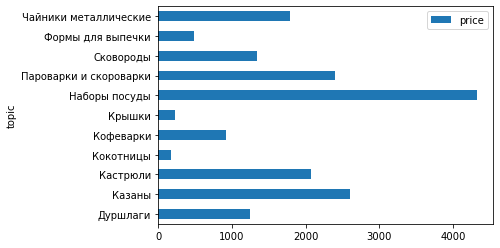

In [22]:
groupped = df_main_topic.groupby('topic').mean()

groupped

groupped.reset_index().plot(kind = 'barh',x='topic',y='price',rot = 0);